In [2]:
import pandas as pd

data = pd.read_csv('/Users/tonydiana/Downloads/imdb-reviews.csv', encoding='UTF-8')

In [3]:
# First, we will convert all characters in the dataset into lowercase:
data.SentimentText = data.SentimentText.str.lower()

In [4]:
# Next, we will write a clean_str function, in which we will clean the reviews using the re module:
import re

def clean_str(string):

     string = re.sub(r"https?\://\S+", '', string)

     string = re.sub(r'\<a href', ' ', string)

     string = re.sub(r'&amp;', 'and', string)

     string = re.sub(r'<br />', ' ', string)

     string = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', string)

     string = re.sub('\d','', string)

     string = re.sub(r"can\'t", "cannot", string)

     string = re.sub(r"it\'s", "it is", string)

     return string

In [5]:
data.SentimentText = data.SentimentText.apply(lambda x: clean_str(str(x)))

In [6]:
# Next, check the word distribution in the dataset using the following code:
pd.Series(' '.join(data['SentimentText']).split()).value_counts().head(10)

movie    43448
film     39083
it       30619
one      26475
is       20324
like     20249
good     15085
the      13902
time     12662
even     12642
dtype: int64

In [7]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize,sent_tokenize

stop_words = stopwords.words('english') + ['movie', 'film', 'time']

stop_words = set(stop_words)

remove_stop_words = lambda r: [[word for word in word_tokenize(sente) if word not in stop_words] for sente in sent_tokenize(r)]

data['SentimentText'] = data['SentimentText'].apply(remove_stop_words)

In [8]:
# Next, we convert the tokens back into sentences and drop the reviews where all the text was stop words:
def combine_text(text):

    try:

        return ' '.join(text[0])

    except:

        return np.nan

data.SentimentText = data.SentimentText.apply(lambda x: combine_text(x))

data = data.dropna(how='any')

In [9]:
# The next step is to convert the text into tokens and then numbers. We will be using the Keras Tokenizer as it performs both the steps for us:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=250)

tokenizer.fit_on_texts(list(data['SentimentText']))

sequences = tokenizer.texts_to_sequences(data['SentimentText'])

Using TensorFlow backend.


In [10]:
# To get the size of the vocabulary, use the following:
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 77273 unique tokens.


In [11]:
# Rows where there are less characters will get padded with 0s. You can increase or decrease this value depending on the accuracy and training time of the model.

from keras.preprocessing.sequence import pad_sequences

reviews = pad_sequences(sequences, maxlen=200)

In [12]:
#You should save the tokenizer so that you can convert the reviews back to text:
import pickle

with open('tokenizer.pkl', 'wb') as handle:

            pickle.dump(tokenizer,

                        handle,

                        protocol=pickle.HIGHEST_PROTOCOL)

# To preview a cleaned review, run the following command:

data.SentimentText[124]

"perfect example divides people groups get joke n't people usually attack n't understand comic style charm unparalleled since great comedy great romance perfect date perfect someone wants good lighthearted laugh perspective tense maybe n't may need counseling injustice paramount kept shelf since early 's never seen light day dvd yet feel urban version honeymooners good idea find odd two alltime favorite romantic comedies never released dvd gene wilder 's world 's greatest lover fox sat since early 's well yet justin kelly nearly every video store country justice world maybe took bash enjoy justin kelly 'm sure one watered enough get sometimes age people lose sense humor sometimes goes stale find comic satisfaction reruns full house"

In [13]:
# To get the actual input to the next step of the process, run the following command:

reviews[124]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16,  15,   2,  16,   2, 129,  20,
       106,  20, 170,   5, 169,   2,  97, 238, 129,   1,  35,  31, 139,
       167, 138, 126, 197,   5, 210,  71,  29,  35, 167,   1,  7

In [16]:
data['SentimentText'] [0]

'first think another disney might good kids watch help enjoy ages love first saw years later still love danny glover superb could play part better christopher lloyd hilarious perfect part tony danza believable mel clark help enjoy give'

In [17]:
# Now, we convert the lists in each row into a single list using the apply function of pandas, using the following code:
data['SentimentText'] = data['SentimentText'].apply(lambda x: x[0])

In [18]:
# Now, we feed this preprocessed data into Word2Vec to create the word embedding:
from gensim.models import Word2Vec

model = Word2Vec(

        data['SentimentText'],

        iter=50,

        size=100,

        window=5,

        min_count=5,

        workers=10)

In [26]:
#First, convert the embedding into two dimensions using PCA. We will plot only the first 200 words. (You can plot more if you like.)

from sklearn.decomposition import PCA

word_limit = 200

X = model[model.wv.vocab][: word_limit]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


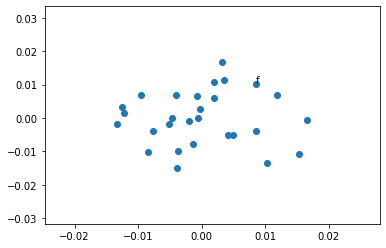

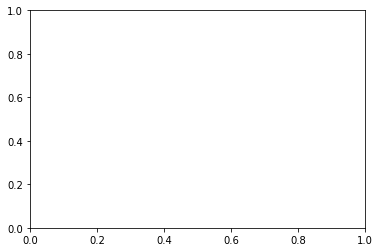

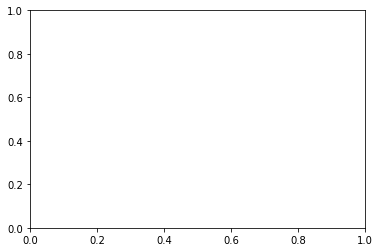

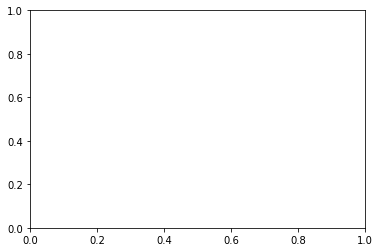

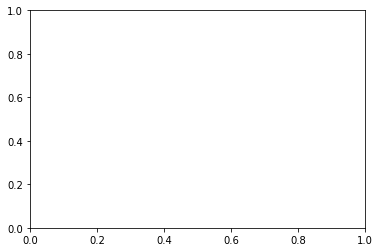

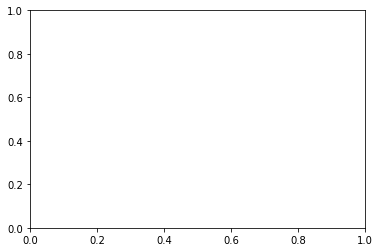

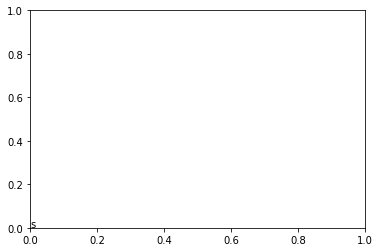

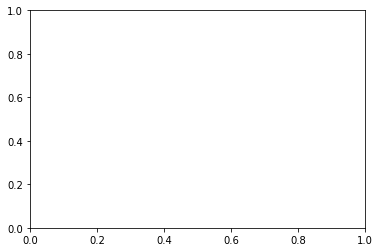

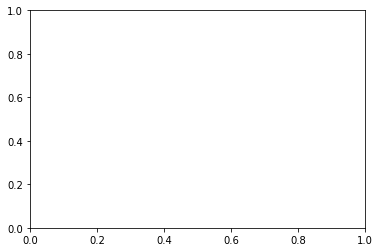

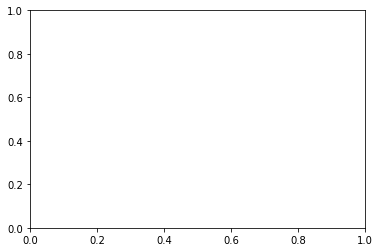

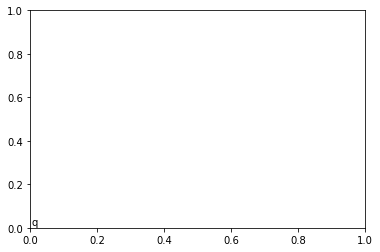

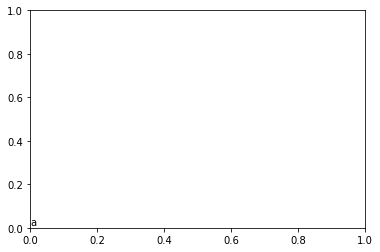

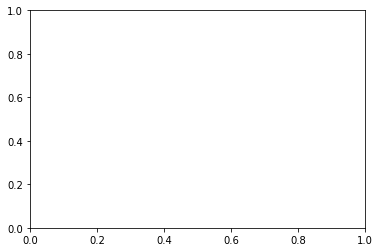

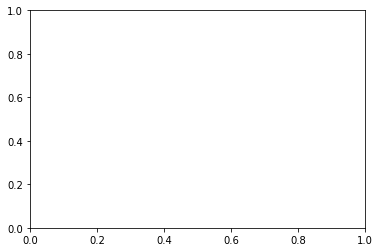

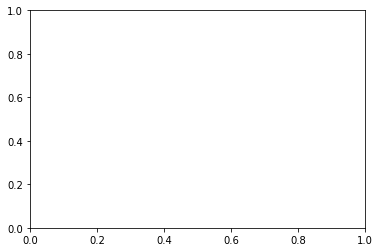

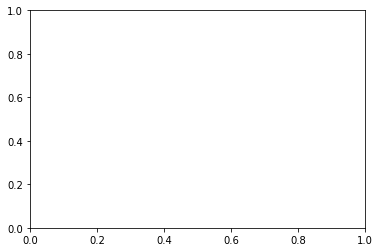

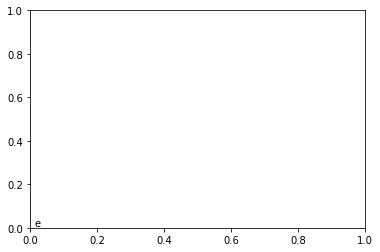

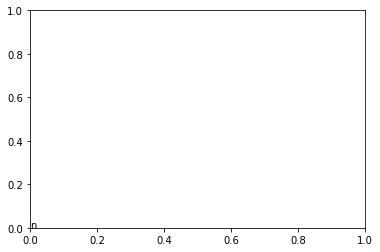

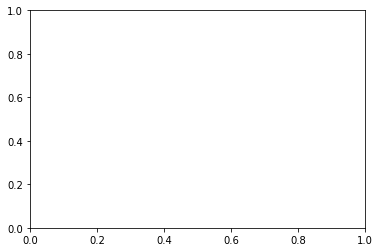

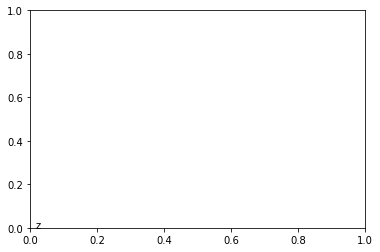

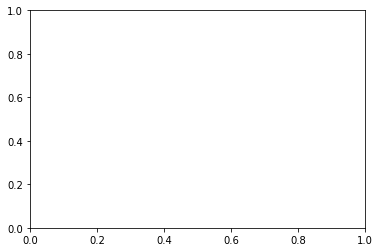

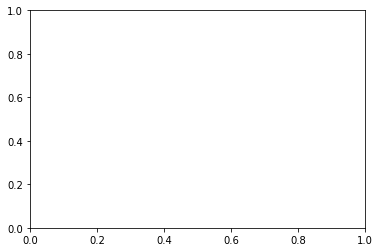

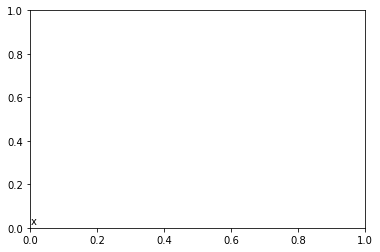

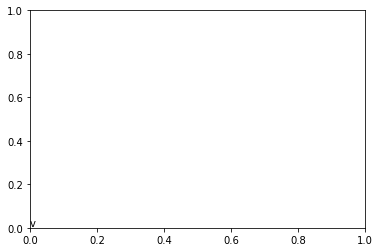

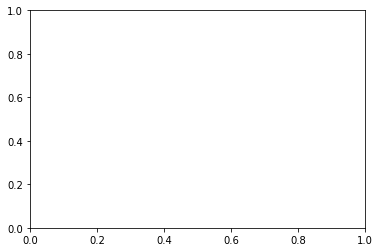

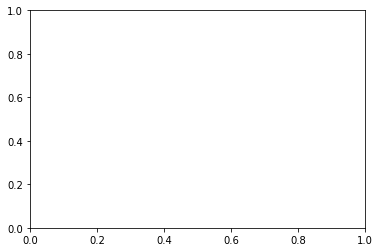

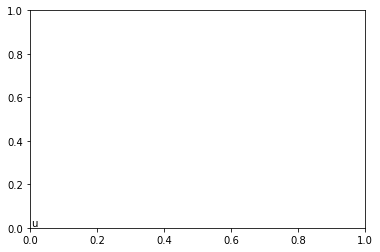

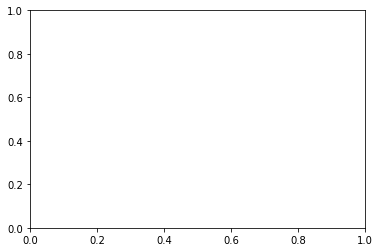

In [29]:
# Now, plot the result on a scatter plot using matplotlib:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)[: word_limit]

for i, word in enumerate(words):

    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()